In [19]:
import pandas as pd
from astropy.timeseries import LombScargle, LombScargleMultiband
import matplotlib.pyplot as plt
import numpy as np
from cesium import featurize
import seaborn as sns

In [2]:
training_set_md = pd.read_csv('training/training_set_metadata.csv')
training_set = pd.read_csv('training/training_set.csv')
# test_set_b1 = pd.read_csv('test/test_set_batch1.csv')
# test_set_md = pd.read_csv('test/test_set_metadata.csv')

In [3]:
passband_to_int_map = {'u':0,'g':1,'r':2,'i':3,'z':4,'y':5}
int_to_passband_map = {y:x for x,y in passband_to_int_map.items()}
train2 = training_set.replace(int_to_passband_map)

- Time shift -> moves in time axis
- Flux shift -> moves in flux axis
- Red shift -> moves in passband axis (kinda feels more non-linear than the others)

Some object types appear to be in our galaxy and others are not

In galaxy -> 92, 65, 16, 6, 53

The other are not in galaxy and 95 is the farthest

In [4]:
np.array(sorted(training_set_md['target'].unique()))

array([ 6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])

In [5]:
training_set_md[training_set_md['target'] == 88][training_set_md['ddf'] == 1]['object_id'].to_numpy()

/tmp/ipykernel_605795/1929337259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  training_set_md[training_set_md['target'] == 88][training_set_md['ddf'] == 1]['object_id'].to_numpy()


array([   713,   3489,   4088,   7315,   7409,   9184,  10586,  14539,
        18507,  23299,  23373,  23931,  24193,  25925,  26531,  30191,
        33422,  34243,  38174,  42852,  48687,  48749,  51178,  52320,
        54883,  58323,  66967,  70272,  70276,  71068,  71676,  71890,
        72053,  75987,  77340,  82740,  91335,  92354,  95483,  95508,
        99452, 103354, 106594, 107439, 109937, 110257, 110551, 110768,
       115859, 116818, 121704, 123211, 124361, 125426, 152812, 153539,
       154648, 155380, 156386, 156537, 158904, 159925, 160737, 163894,
       165985, 173317, 173500, 175907, 177149, 177557, 186060, 190102,
       191334, 192492, 193712, 194786, 197475, 206141, 209630, 209911,
       211120, 211290, 215351, 215930, 225416, 229471, 232681, 237006,
       239050, 242991, 245610, 245853, 246759, 250572, 252575, 255194,
       258055, 259447, 260996, 261863, 266762, 276083, 276496, 278407,
       279243, 285617, 292384, 294841, 298585, 314451, 320141, 320656,
      

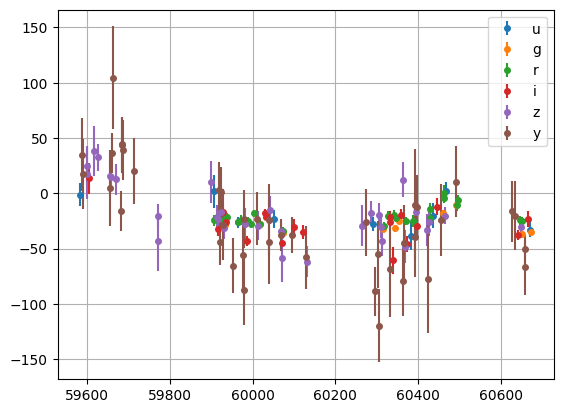

In [6]:
objid = 7284232
obj615 = train2[train2['object_id'] == objid]
tofittime = []
tofitflux = []
tofitbands = []
tofitdy = []
for pb in 'ugrizy':
    data = obj615[(obj615['passband'] == pb)][['mjd','flux','flux_err']].to_numpy()
    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],marker='o', markersize=4,linestyle='none',label=pb)
    # plt.plot(data[:,0], data[:,1])
    # plt.plot(data[1:,0], np.diff(data[:,1]))
    tofittime.extend(data[:,0].tolist())
    tofitflux.extend(data[:,1].tolist())
    tofitdy.extend(data[:,2].tolist())
    tofitbands.extend(pb * data[:,0].shape[0])
plt.legend()
plt.grid()
plt.show()
# obj615 = train2[train2['object_id'] == objid]
# data = obj615[['mjd','flux','passband','flux_err']].to_numpy()
# ls = LombScargleMultiband(tofittime, tofitflux, tofitbands, tofitdy)
# frequency,power = ls.autopower(nyquist_factor=10)
# # nyquist_factor=2, samples_per_peak=200
# plt.plot(frequency, power)
# plt.show()
# freq = frequency[np.argmax(power)]
# print(freq)
# t_fit = np.linspace(0, 1)
# pow = ls.model(t_fit, freq)
# plt.plot(t_fit, pow[0,:])
# plt.errorbar((np.array(tofittime) / freq) % 1,tofitflux,yerr=tofitdy,marker='o', markersize=4,linestyle='none')
# plt.show()

target
90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: count, dtype: int64


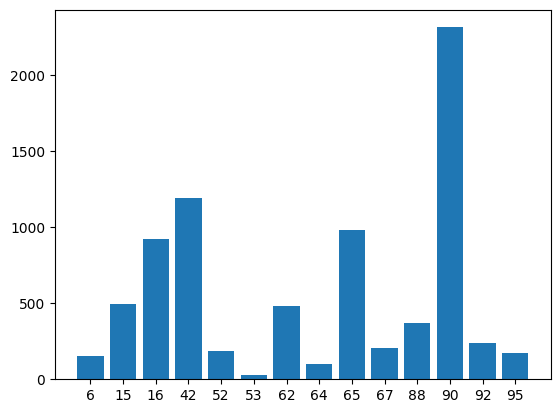

In [7]:
target_classes = [92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53]
target_classes.sort()
object_counts_by_target = training_set_md.value_counts(subset='target').sort_index().to_numpy()
print(training_set_md.value_counts(subset='target'))
plt.bar(list(range(len(target_classes))), object_counts_by_target)
plt.xticks(ticks=list(range(len(target_classes))),labels=target_classes)
plt.show()
# I want to make this a stacked plot with redshift bins

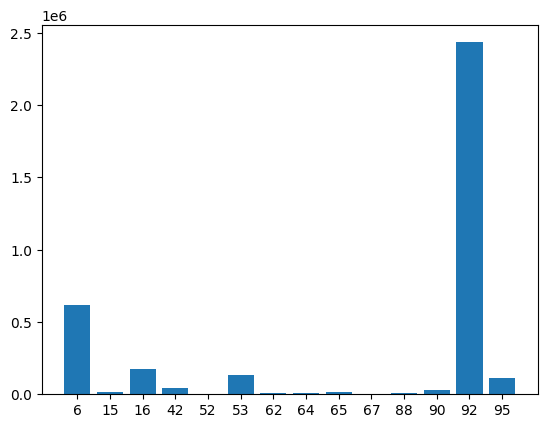

In [8]:
target_classes = [92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53]
target_classes.sort()
# for each class, I can take the max of flux over all objects over all passbands over all redshifts
max_flux_by_class = [training_set[training_set['object_id'].isin(training_set_md[training_set_md['target'] == i]['object_id'])]['flux'].max() for i in target_classes]
plt.bar(list(range(len(target_classes))), max_flux_by_class)
plt.xticks(ticks=list(range(len(target_classes))),labels=target_classes)
plt.show()
# I want to make this a stacked plot with redshift bins

In [ ]:
((training_set_md['hostgal_specz'] - training_set_md['hostgal_photoz']).abs() > 0.2).sum() / len(training_set_md)

np.float64(0.0867737003058104)

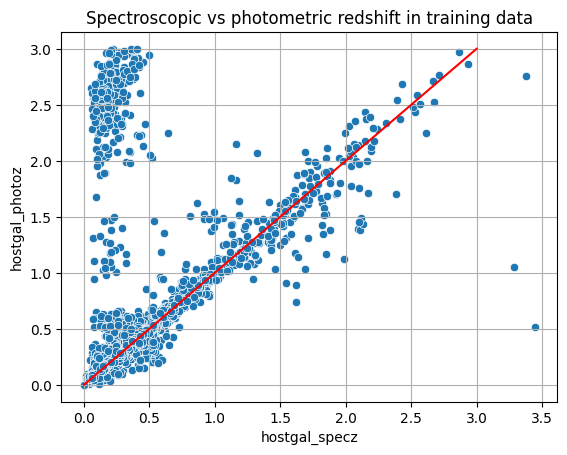

In [26]:
data = training_set_md[['hostgal_specz', 'hostgal_photoz','target']]
# plt.scatter(data[:,0], data[:,1],marker='o',s=2,zorder=2)
sns.scatterplot(data=data, x='hostgal_specz', y='hostgal_photoz')
plt.xlabel('hostgal_specz')
plt.ylabel('hostgal_photoz')
plt.title('Spectroscopic vs photometric redshift in training data')
x = np.linspace(0,3)
plt.plot(x,x,zorder=3,c='red')
# plt.fill_between(x,x+0.2,x-0.2,alpha=0.5,zorder=4,color='lightblue')
plt.grid(zorder=1)
plt.show()

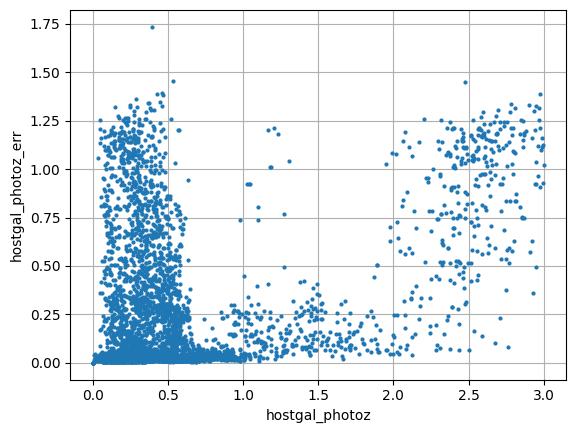

In [11]:
data = training_set_md[['hostgal_specz', 'hostgal_photoz','hostgal_photoz_err']].to_numpy()
plt.errorbar(data[:,1], data[:,2],linestyle='none',marker='o',markersize=2,zorder=2)
plt.xlabel('hostgal_photoz')
plt.ylabel('hostgal_photoz_err')
plt.grid(zorder=1)
plt.show()

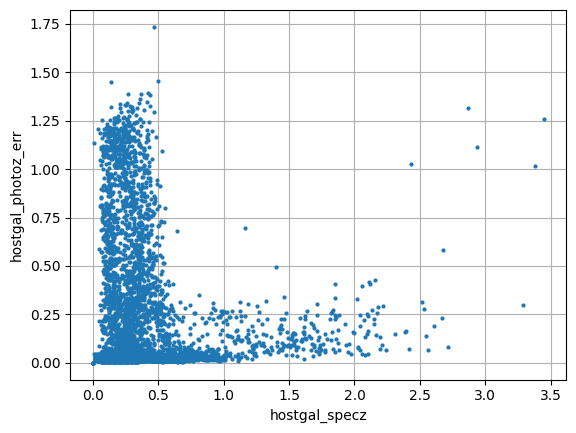

In [12]:
data = training_set_md[['hostgal_specz', 'hostgal_photoz','hostgal_photoz_err']].to_numpy()
plt.errorbar(data[:,0], data[:,2],linestyle='none',marker='o',markersize=2,zorder=2)
plt.xlabel('hostgal_specz')
plt.ylabel('hostgal_photoz_err')
plt.grid(zorder=1)
plt.show()

42,90, 67, 62, 15, 52, 64 is catastrophic

catastrophic as in there are a few objects which have terribly wrong photoz. Usually the photoz is way larger than specz, and the errors are clustered around some value of specz. Usually the errors are when the object is close by.

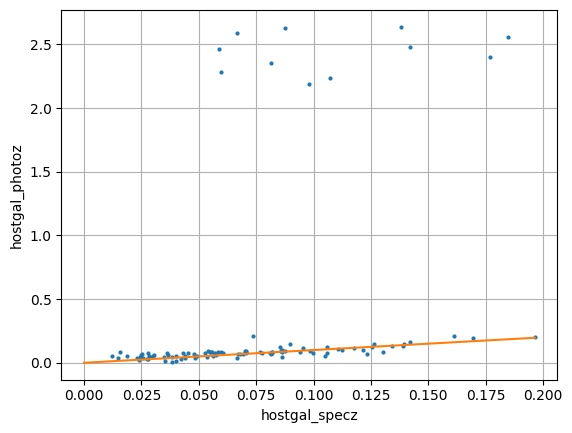

In [13]:
# [92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53]
data = training_set_md[training_set_md['target'] == 64][['hostgal_specz', 'hostgal_photoz','hostgal_photoz_err']].to_numpy()
plt.errorbar(data[:,0], data[:,1],linestyle='none',marker='o',markersize=2,zorder=2)
plt.xlabel('hostgal_specz')
plt.ylabel('hostgal_photoz')
x = np.linspace(0,np.max(data[:,0]))
plt.plot(x,x,zorder=3)
plt.grid(zorder=1)
plt.show()

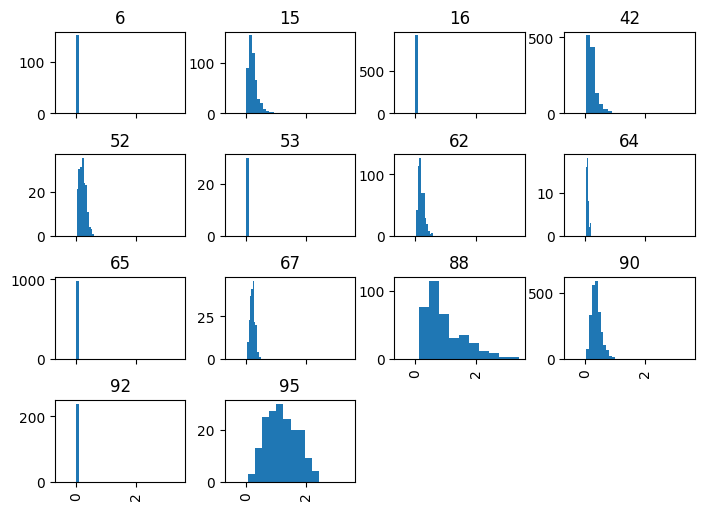

In [14]:
training_set_md.hist(column='hostgal_specz',by='target',sharex=True,figsize=(8,6))
plt.show()

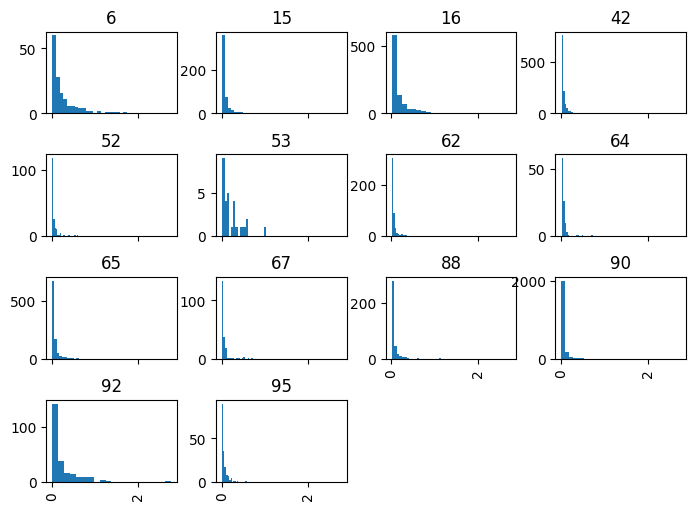

In [15]:
training_set_md.hist(column='mwebv',by='target',sharex=True,figsize=(8,6),bins=20)
plt.show()

In [75]:
diffs = []
for o in training_set_md[(training_set_md['ddf'] == 0)]['object_id']:
    diff = training_set[(training_set['object_id'] == o)]['mjd'].max() - training_set[(training_set['object_id'] == o)]['mjd'].min()
    diffs.append(diff)

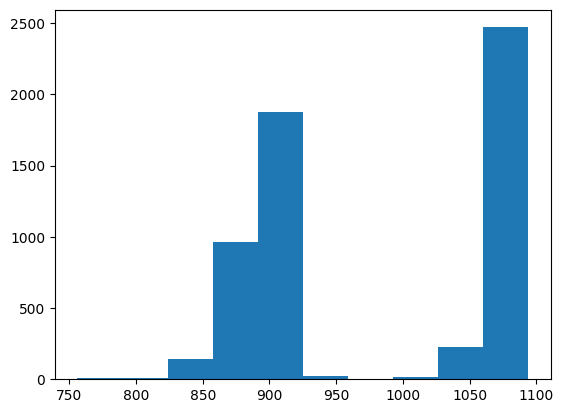

In [76]:
plt.hist(diffs,bins=10)
plt.show()

In [33]:
training_set['mjd'].sort_values()

1003642    59580.0343
1312459    59580.0347
853318     59580.0347
1154854    59580.0347
700486     59580.0347
              ...    
910679     60674.3625
1273076    60674.3625
1341679    60674.3625
829777     60674.3625
933119     60674.3630
Name: mjd, Length: 1421705, dtype: float64